<a href="https://colab.research.google.com/github/Griff-Kaiga/Factors-Affecting-House-Prices/blob/master/Factors_Affecting_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question


As a Data Scientist working with Hass Consulting have been tasked to study the factors affecting the house prices given information on real estate properties that had been collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b) Defining the Metric for Success

the project will be considered a success once:  

*   a model that accurately predicts the said sale upon provision of predictors is created
*   List item


### c) Understanding the context 

### d) Recording the Experimental Design

Read and explore the given dataset.

1.   Read and explore the given dataset.
2.   Find and deal with outliers, anomalies, and missing data within the   dataset.
3.  Perform univariate, bivariate and multivariate analysis 
4.  Performing regression analysis.
5.  Provide a recommendation based on your analysis.
6.  Challenge your solution by providing insights on how to make improvements in model improvement.



### e) Data Relevance

For this project, a one table data set was provided. This contained information in the form of rows and columns on various factors. The data contained information on houses such as: the bedroom, the bathroom, the price,the size in square feet, and the condition,.
The data set contained relevant information that will assist in solving the challenge at hand.

## 2. Reading the Data

In [1]:
# importing the relevant libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset
# Dataset url = /content/Independent Project Week 7 - house_data.csv
#
house = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
house.shape

(21613, 20)

In [4]:
# Previewing the top of our dataset
#
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Previewing the bottom of our dataset
# 
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Checking whether each column has an appropriate datatype and also checking for missing values
#
house.info()
# from the information below, the dataset does not contain missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 5. Tidying the Dataset

In [7]:
# Checking for Anomalies
#

In [8]:
# checking for duplicate values
#
house.duplicated().any()

True

In [9]:
# dropping duplicated values
#
house.drop_duplicates(keep='first', inplace=True)
# 

In [10]:
# verifying to ensure that we dont have any more duplicates
#
house.duplicated().any()

False

In [11]:
# checking shape after dropping duplicates
house.shape

(21610, 20)

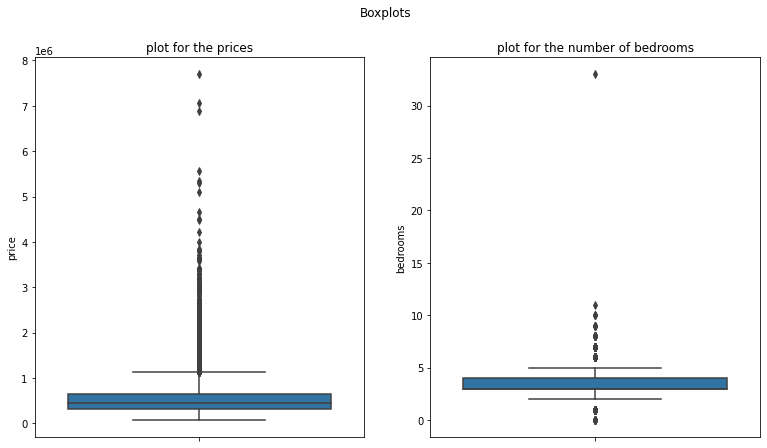

In [12]:
# checking for outliers 
fig, ax = plt.subplots(1,2, figsize=(13,7))
fig.suptitle('Boxplots')
sns.boxplot(data=house, y = 'price', ax=ax[0])
ax[0].set_title('plot for the prices')
sns.boxplot(data=house, y = 'bedrooms', ax=ax[1])
ax[1].set_title('plot for the number of bedrooms')

plt.show()


In [13]:
# checking for missing values
house.isnull().any().sum()

0

In [14]:
# dropping the column ID
#
house = house.drop('id', axis=1)



## 6. Exploratory Analysis

Univariate Analysis

In [15]:
# frequency table for the price
#
house.price.value_counts()

450000.0    172
350000.0    172
550000.0    158
500000.0    152
425000.0    150
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3625, dtype: int64

In [16]:
# frequency table for the year built
house.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [17]:
# frequency table for the zipcode
house.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [18]:
# frequency table for the waterfront
house.waterfront.value_counts()


0    21447
1      163
Name: waterfront, dtype: int64

In [19]:
# frequency table for the floor
house.floors.value_counts()

1.0    10680
2.0     8238
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [20]:
# frequency table for the grade
house.grade.value_counts()

7     8981
8     6066
9     2614
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

Text(0.5, 1.0, 'freq plot for sqft area of the parking lot area')

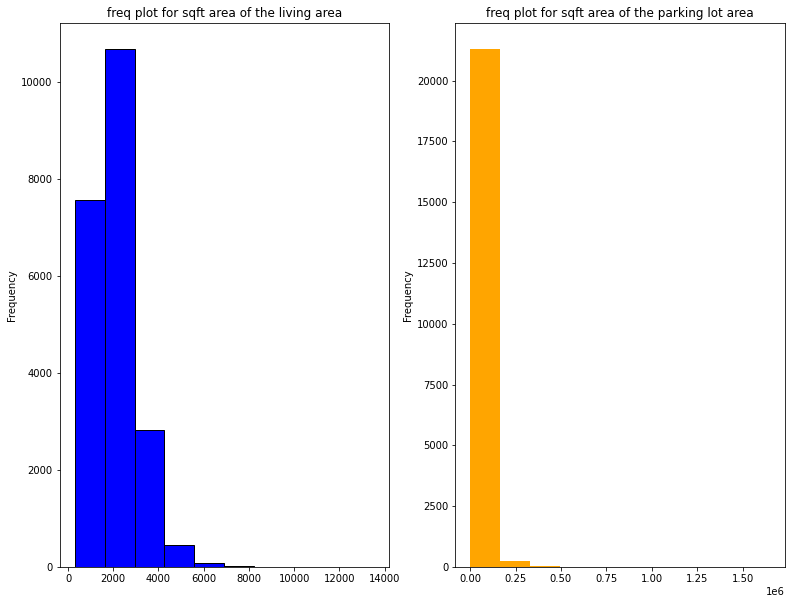

In [21]:
# histogram plots 
fig, ax = plt.subplots(1,2, figsize= (13, 10))
house['sqft_living'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color= 'blue')
ax[0].set_title('freq plot for sqft area of the living area')

house['sqft_lot'].plot.hist(ax=ax[1], bins=10, color= 'orange')
ax[1].set_title('freq plot for sqft area of the parking lot area')


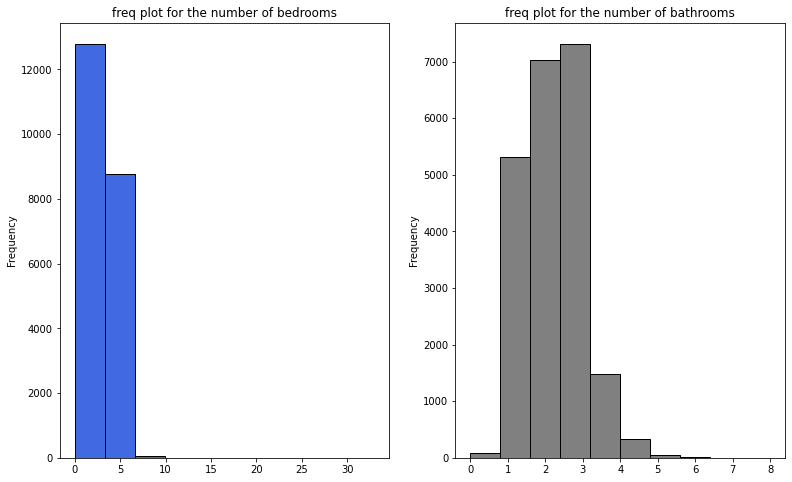

In [22]:
# histogram plot for no of bathrooms and bedrooms
fig, ax = plt.subplots(1,2, figsize=(13,8))
house['bedrooms'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color= 'royalblue')
ax[0].set_title('freq plot for the number of bedrooms')

house['bathrooms'].plot.hist(ax=ax[1], bins=10, edgecolor='black', color= 'grey')
ax[1].set_title('freq plot for the number of bathrooms')
plt.show()


Bivariate Analysis

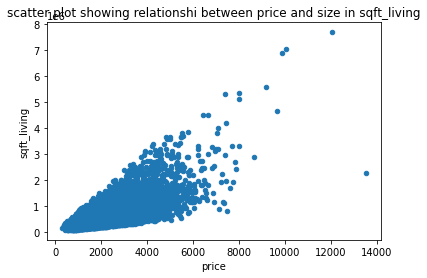

In [23]:
# scatter plot showing the relationship between size and sqrft living
house.plot(x='sqft_living', y='price', kind='scatter')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('scatter plot showing relationshi between price and size in sqft_living')
plt.show()

In [24]:
# checking for the correlation  
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265


## 7. Implementing the Solution

steps involved include:
performing regression analysis by:


1.   checking for multicolinearity
2.   residual plots   and heteroskedacity testing



Checking for multicolinearity

In [25]:
# removing the price column, we want to focus only on the independent variables
# 
independent_only = house.drop(columns=['price'], axis=1)

# displaying the correlations between the variables
correlations = independent_only.corr()
correlations


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,-0.261163,-0.000823,0.343791,0.731870,0.194060


In [26]:
# using the correlations to get the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index=correlations.index, columns=correlations.columns)

# the sqft_living has a score of 1.814600e-12, sqft_above has a score of 1.475124e+13, sqft_basement has a score of 4.213458e+12.
# these have a value greater than 5. 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652159,-0.461426,-6.131806e-01,0.049327,0.049848,0.063078,0.114430,-0.050633,0.306941,-3.237657e-01,-1.881523e-01,0.134509,0.045800,0.080174,0.050839,0.017554,0.025284,0.085416
bathrooms,-0.461426,3.351248,-3.146032e+00,-0.024033,-0.675409,0.010097,-0.042387,-0.137265,-0.267927,1.566362e+00,4.385015e-01,-0.935745,-0.260436,0.041789,-0.041080,0.053741,0.092020,0.071444
sqft_living,-0.614125,-3.147527,1.814600e+13,-0.083836,2.725995,-0.075267,-0.010738,-0.174659,-1.942256,-1.636081e+13,-8.743992e+12,0.465511,0.157235,-0.351953,-0.055686,0.225522,-1.068731,-0.050464
sqft_lot,0.049327,-0.024033,-8.472318e-02,2.102526,0.045181,0.027369,-0.059109,0.030522,-0.053865,-1.229640e-01,-1.799981e-03,0.098734,0.021295,-0.002580,0.053339,-0.133206,0.163933,-1.459308
floors,0.049848,-0.675409,2.727895e+00,0.045181,2.011974,-0.005524,-0.040067,0.089832,-0.230827,-2.964235e+00,-6.995572e-01,-0.481324,-0.079986,-0.170816,-0.127521,0.164281,0.272632,0.072657
waterfront,0.063078,0.010097,-7.563028e-02,0.027369,-0.005524,1.203970,-0.492855,-0.012820,0.049272,-4.380875e-02,3.280588e-02,-0.021102,-0.065851,0.022562,0.009815,0.027241,0.054397,-0.018480
view,0.114430,-0.042387,-9.767467e-03,-0.059109,-0.040067,-0.492855,1.435320,-0.021126,-0.185270,4.816459e-02,-2.516918e-01,0.151685,-0.039119,-0.140639,0.118633,0.071934,-0.325388,-0.007469
condition,-0.050633,-0.137265,-1.749044e-01,0.030522,0.089832,-0.012820,-0.021126,1.249500,-0.054508,2.132228e-01,-1.323553e-02,0.561510,0.206913,0.161279,0.063727,-0.006876,0.075908,-0.028242
grade,0.306941,-0.267927,-1.945115e+00,-0.053865,-0.230827,0.049272,-0.185270,-0.054508,3.416981,1.441457e-01,4.510090e-01,-0.638907,-0.071472,0.083155,-0.330860,0.393716,-0.911600,0.071863
sqft_above,-0.321458,1.564793,-1.636081e+13,-0.123737,-2.962207,-0.044143,0.049025,0.212984,0.141509,1.475124e+13,7.883763e+12,0.100178,-0.142897,0.241689,0.231229,-0.545073,-0.572072,-0.130215


In [27]:
# checking the correlations less the values with high VIF scores
revised = independent_only.drop(columns=['sqft_living', 'sqft_above', 'sqft_basement'])
correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns= correlations.columns)

# all the scores dropped, but the batrooms score dropped significantly indicating that it was highly correlated with the dropped variables

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.459639,-0.797621,0.015625,0.072855,0.047175,0.081416,-0.057630,0.013440,0.242510,0.043538,0.057631,0.063493,-0.007161,-0.255790,0.052407
bathrooms,-0.797621,2.695228,-0.070430,-0.470760,-0.006948,-0.151196,-0.173065,-0.706067,-0.754958,-0.266856,-0.004826,-0.052337,0.072536,-0.329150,0.020730
sqft_lot,0.015625,-0.070430,2.094376,0.019485,0.022647,-0.055643,0.033559,-0.118689,0.119053,0.021345,-0.005216,0.061582,-0.148729,0.102139,-1.466339
floors,0.072855,-0.470760,0.019485,1.616759,-0.029218,0.085952,0.146938,-0.373277,-0.475583,-0.073820,-0.150826,-0.049442,0.019401,0.139986,0.060065
waterfront,0.047175,-0.006948,0.022647,-0.029218,1.200987,-0.487621,-0.009729,0.013451,-0.010965,-0.065653,0.021828,0.016050,0.015559,0.020338,-0.022285
view,0.081416,-0.151196,-0.055643,0.085952,-0.487621,1.391689,-0.039828,-0.180383,0.164405,-0.041340,-0.149884,0.096047,0.113678,-0.321881,-0.007985
condition,-0.057630,-0.173065,0.033559,0.146938,-0.009729,-0.039828,1.241178,-0.039722,0.562762,0.205986,0.157980,0.052775,0.013422,0.089528,-0.027071
grade,0.013440,-0.706067,-0.118689,-0.373277,0.013451,-0.180383,-0.039722,2.889233,-0.465822,-0.072253,0.056611,-0.275567,0.289168,-1.415296,0.014060
yr_built,0.242510,-0.754958,0.119053,-0.475583,-0.010965,0.164405,0.562762,-0.465822,2.368748,0.534713,0.268625,0.299542,-0.484607,0.243273,-0.014442
yr_renovated,0.043538,-0.266856,0.021345,-0.073820,-0.065653,-0.041340,0.205986,-0.072253,0.534713,1.150383,0.036282,0.045099,-0.052172,0.098462,-0.022335


Residual Plot and Heteroscedacity

In [28]:
# Creating a model based on the revised set of independent variables
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values

y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# this is our prediction for the price based on our model
price_predict = regressor.predict(X_test)


# we now create our plot by subtracting the test from the predicted 
residuals = np.subtract(y_test, price_predict)

# describing our residuals
pd.DataFrame(residuals).describe()
residuals.mean()



1473.9489623111924

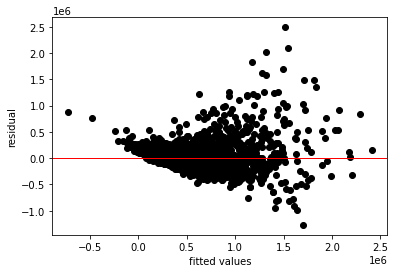

In [29]:
# showing the residual plot
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# our residuals are centered around the mean that is close to zero and there are no glaringly obvious patterns

In [30]:
# performing heteroskedacity test
import scipy as sp
test_results, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if ( test_results > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Ridge Regression

In [31]:
# loading libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [32]:
# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, price_predict)) 

# The output  value of 42923342713.65 will be our indicator to determine if the regularized ridge regression model is superior or not.

Mean Squared Error: 42923342713.656395


In [33]:
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates.
ridge = Ridge(normalize=True)

# Next we setup the grid that we will use.

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [34]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
print(search.best_params_)

abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 4589680382.14799 is worse than what the baseline model was. 

{'alpha': 0.01}


45879680382.14799

In [35]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

45505202968.35788


Lasso Regression

In [36]:
# standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std = scaler.fit_transform(X)

In [37]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6629053509883047
lasso MSE: 45496785554.65012
lasso coef: [-2.93201741e+03  1.06356815e+05  2.70509792e-01  1.35317046e+04
  6.17103710e+05  5.69163591e+04  2.65468110e+04  1.38406476e+05
 -3.21742931e+03  2.06573560e+01 -5.21719062e+02  5.77686903e+05
 -1.67298381e+05  9.12526650e+01 -1.79359210e-01]


In [38]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 
# Making necessary imports
import warnings
warnings.filterwarnings("ignore")

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 22.0}
lasso score: 0.6735080851977739
linear score: 0.673388515640788
lasso MSE: 42907628859.98499
linear MSE: 42923342713.656395
lasso best estimator coef: [-4.16959422e+03  1.04811467e+05  2.93075033e-01  1.13370573e+04
  6.81806785e+05  5.71743235e+04  2.66974864e+04  1.37660569e+05
 -3.14877737e+03  2.16042183e+01 -5.05918215e+02  5.76739543e+05
 -1.70137028e+05  9.40343540e+01 -1.76311876e-01]
linear coef: [-4.20321930e+03  1.04851406e+05  2.93919850e-01  1.14008321e+04
  6.85221980e+05  5.70537465e+04  2.67649983e+04  1.37600365e+05
 -3.14585081e+03  2.15896945e+01 -5.08998757e+02  5.78115194e+05
 -1.72065198e+05  9.40892972e+01 -1.75347281e-01]


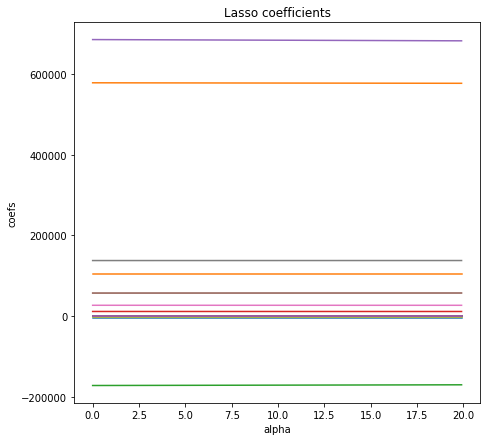

In [39]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

Elastic Net Regression

In [40]:
# importing elastic net model
from sklearn.linear_model import ElasticNet

# creating the X
X = revised

In [41]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 104851.40555256778,
 'bedrooms': -4203.219303263202,
 'condition': 26764.998319077746,
 'floors': 11400.832076204313,
 'grade': 137600.36497652286,
 'lat': 578115.1935974483,
 'long': -172065.19793841618,
 'sqft_living15': 94.08929719178195,
 'sqft_lot': 0.29391985044640023,
 'sqft_lot15': -0.17534728134342004,
 'view': 57053.74648327634,
 'waterfront': 685221.9797446762,
 'yr_built': -3145.8508139137225,
 'yr_renovated': 21.589694548746138,
 'zipcode': -508.99875681712786}

In [42]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [43]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

# The best hyperparameters was an alpha set to 1e-05 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 45955977052.75817. This is above our baseline model of MSE 42923342713.656395  for the baseline model. 

45955977052.75817

In [44]:
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

45629373591.206245


In [45]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 99780.2832950173,
 'bedrooms': 1031.2956681227345,
 'condition': 28891.26649654639,
 'floors': 15623.8931030529,
 'grade': 128044.986073626,
 'lat': 567132.4166303084,
 'long': -167130.5937679406,
 'sqft_living15': 97.36441469660386,
 'sqft_lot': 0.2601477440989186,
 'sqft_lot15': -0.13977191121667001,
 'view': 58552.41134214511,
 'waterfront': 595582.1843664289,
 'yr_built': -2834.694540363451,
 'yr_renovated': 26.555722701274707,
 'zipcode': -451.47134605703235}

Quantile Regression

In [46]:
features = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade' , 'lat', 'long', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
target = house['price'] 

In [47]:
from sklearn import preprocessing
independent = house[features]
dependent = house['price']
# Standardize the variables
# It is not necessary to standardize the target. I do it just for convenience.
X_scaled = pd.DataFrame(preprocessing.scale(independent))
Y_scaled = preprocessing.scale(dependent)
X_scaled.columns = features

In [48]:
X = revised

R Squared score is 0.67


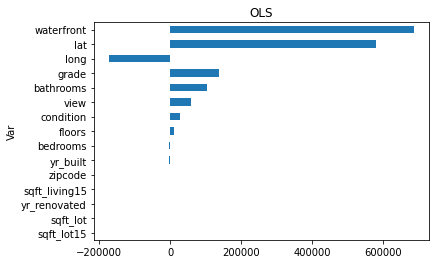

In [51]:
# model evaluation for testing set


r2 = metrics.r2_score(y_test, price_predict).round(2)
print('R Squared score is {}'.format(r2) )

# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = X.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = regressor.coef_
w['beta_abs'] = np.abs(w['beta']) # Get the absolute value for ranking
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh()
plt.title('OLS')
plt.show()

In [52]:
print("The mean squared error for the linear model:",metrics.mean_squared_error(y_test, price_predict))

The mean squared error for the linear model: 42923342713.656395


In [ ]:
print("The mean squared error for the quantile model:",metrics.mean_squared_error(Y_test, Y_test_pred2))

In [58]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   
   coefs['q'] = q
   coefs.columns = ['beta_lower','beta_upper']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
y_test_pred1 = Q_reg.QuantReg(y_train, X_train).fit(q=0.25).predict(X_test)
y_test_pred2 = Q_reg.QuantReg(y_train, X_train).fit(q=0.5).predict(X_test)
y_test_pred3 = Q_reg.QuantReg(y_train, X_train).fit(q=0.75).predict(X_test)
r2 = metrics.r2_score(y_test,price_predict)
print('R2 score for the 50th percentile is {}'.format(r2) ) # 0.490744

R2 score for the 50th percentile is 0.673388515640788


In [60]:
comparison = pd.DataFrame({'Actual': y_test,'Linear': price_predict,'50th Quantile': price_predict,'25th Quantile':price_predict,'75th Quantile':price_predict})
comparison.describe()

,Actual,Linear,50th Quantile,25th Quantile,75th Quantile
count,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03
mean,5.434344e+05,5.419604e+05,5.419604e+05,5.419604e+05,5.419604e+05
std,3.625612e+05,3.047868e+05,3.047868e+05,3.047868e+05,3.047868e+05
min,8.100000e+04,-7.290389e+05,-7.290389e+05,-7.290389e+05,-7.290389e+05
25%,3.230000e+05,3.419879e+05,3.419879e+05,3.419879e+05,3.419879e+05
50%,4.500000e+05,4.943316e+05,4.943316e+05,4.943316e+05,4.943316e+05
75%,6.500000e+05,6.799736e+05,6.799736e+05,6.799736e+05,6.799736e+05
max,4.000000e+06,2.412770e+06,2.412770e+06,2.412770e+06,2.412770e+06


In [61]:
coefs

,beta_lower,beta_upper
0,1731.363915,0.75
1,73568.926173,0.75
2,0.379837,0.75
3,30483.380388,0.75
4,151952.872873,0.75
5,88121.931350,0.75
6,26289.504320,0.75
7,112641.431562,0.75
8,-2762.639389,0.75
9,30.792141,0.75


In [62]:
Qreg_coefs

,beta_lower,beta_upper
0,3136.152208,0.25
1,50561.245412,0.25
2,0.260573,0.25
3,26199.051807,0.25
4,159667.603726,0.25
5,40189.715555,0.25
6,25323.930796,0.25
7,83270.923017,0.25
8,-1845.804433,0.25
9,13.903283,0.25


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?